In [1]:
import numpy as np
import matplotlib.patches as mpatches 
import random
import os

# %matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import mne
from mne.preprocessing import ICA

from utils.MNE_Utils import MNE_Utils
from utils.BadChannels import BadChannels
from utils.Utilities import Utilities
from utils.EEGDataset import EEGDataset


Utilities_handler = Utilities()
MNE_Utils_handler = MNE_Utils()

In [2]:
# dataset = EEGDataset(subset="train",eeg_signals_path="./data/eeg/eeg_55_95_std.pth", eeg_splits_path="./data/eeg/block_splits_by_image_all.pth", subject=1,preprocessin_fn=None, time_low=0, time_high=480)
dataset = EEGDataset(subset="train",eeg_signals_path="./data/eeg/eeg_signals_raw_with_mean_std.pth", eeg_splits_path="./data/eeg/block_splits_by_image_all.pth", subject=1,preprocessin_fn=None, time_low=0, time_high=490)

In [3]:
# label_wise_data = Utilities_handler.load_data_label_wise(dataset,None,None,None,False)
# eeg_features, eeg_labels = Utilities_handler.prepareEEGData(label_wise_data,convert_to_numpy=True,flatten_eeg=False)

label_wise_data, eeg_features, eeg_labels = Utilities_handler.PrepapreDataforVis(dataset)

In [4]:
print(f"Total Classes: {len(label_wise_data.keys())}   EEG featuers size: {eeg_features.shape} EEG labels length: {len(eeg_labels)}")

Total Classes: 40   EEG featuers size: (1320, 490, 128) EEG labels length: 1320


In [5]:
numberofSamples,freqLength,numChannels = eeg_features.shape

In [ ]:
# Utilities_handler.plotSampleEEGChannels(eeg_features,channels_to_plot=[21,61])

In [6]:
channelMap = Utilities_handler.read_channel_map(input_file="./channelmap.txt")
channel_names = list(channelMap.values())  # Add more channel names as needed
channel_types = ['eeg'] * len(channel_names) # Define channel types (e.g., EEG, EOG, ECG)

In [7]:
# # Define sampling frequency (e.g., 1000 Hz or 1KHz)
# sfreq = 1000  # Replace with your actual sampling frequency
# # Create info structure
# channel_types = ['eeg'] * len(channel_names)
# info = mne.create_info(ch_names=channel_names, ch_types=channel_types, sfreq=sfreq)

# # Create MNE raw data object from NumPy array
# RawSamples = []
# for samplesIdx in range(numberofSamples):
#     raw_data = mne.io.RawArray(eeg_features[samplesIdx,:,:].T, info)  # Transpose EEG_data to match MNE's channel x time format
#     RawSamples.append(raw_data)
# Raw_MNE_EEG_DATA = mne.io.concatenate_raws(RawSamples)
# # Raw_MNE_EEG_DATA.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)

Raw_MNE_EEG_DATA = MNE_Utils_handler.create_RAW_data(eeg_features=eeg_features
                                                     ,channel_names=channel_names,
                                                     channel_types=channel_types,
                                                     sampling_freq=1000)

Creating RawArray with float64 data, n_channels=128, n_times=490
    Range : 0 ... 489 =      0.000 ...     0.489 secs
Ready.
Creating RawArray with float64 data, n_channels=128, n_times=490
    Range : 0 ... 489 =      0.000 ...     0.489 secs
Ready.
Creating RawArray with float64 data, n_channels=128, n_times=490
    Range : 0 ... 489 =      0.000 ...     0.489 secs
Ready.
Creating RawArray with float64 data, n_channels=128, n_times=490
    Range : 0 ... 489 =      0.000 ...     0.489 secs
Ready.
Creating RawArray with float64 data, n_channels=128, n_times=490
    Range : 0 ... 489 =      0.000 ...     0.489 secs
Ready.
Creating RawArray with float64 data, n_channels=128, n_times=490
    Range : 0 ... 489 =      0.000 ...     0.489 secs
Ready.
Creating RawArray with float64 data, n_channels=128, n_times=490
    Range : 0 ... 489 =      0.000 ...     0.489 secs
Ready.
Creating RawArray with float64 data, n_channels=128, n_times=490
    Range : 0 ... 489 =      0.000 ...     0.489 secs

In [8]:
Raw_MNE_EEG_DATA.info["bads"] = BadChannels

In [9]:
RemainingChannels = 128 - len(BadChannels)
Raw_MNE_EEG_DATA = Raw_MNE_EEG_DATA.drop_channels(BadChannels)
print(f"RemainingChannels: {RemainingChannels}")

RemainingChannels: 32


In [10]:
# mne.channels.get_builtin_montages()
for builtInMontage in mne.channels.get_builtin_montages():
    Montage  = mne.channels.make_standard_montage(kind=builtInMontage)
    try:
        Raw_MNE_EEG_DATA.set_montage(Montage)
        print(f"set montage done for  {Montage}")
        break
    except:
        pass
# Montage.plot()

set montage done for  <DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 343 channels>


In [ ]:
## POWER Line noise removal
# freqs = [50]  # Frequencies to be notched out (example: 50Hz for power-line noise)
# Raw_MNE_EEG_DATA.notch_filter(freqs, filter_length='auto', phase='zero')

# filtered_data  = Raw_MNE_EEG_DATA.get_data()
# filtered_data = filtered_data.reshape((numberofSamples,freqLength,numChannels))
# filtered_data.shape
# # filt_raw

# signal = eeg_features[0][:, 61]
# signal_filtered = filtered_data[0][:, 61]

# t = np.linspace(0, 0.1, signal.shape[0], endpoint=False)  # 10 second signal

# plt.clf()
# plt.figure().set_size_inches(20,4)
# plt.plot(t, signal, label='Original Signal chn: 30', c="blue")
# plt.plot(t, signal_filtered, label='Filtered Signal chn: 30', c="red")


# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Filtered Signals')
# plt.legend()
# plt.grid(True)
# plt.show()

In [11]:
remaining_channel_names = Raw_MNE_EEG_DATA.ch_names
remaining_channel_types = ['eeg'] * len(Raw_MNE_EEG_DATA.ch_names)
sfreq = 1000
LOW_FREQ_BAND = 8
HIGH_FREQ_BAND = 150
info = MNE_Utils_handler.createInfoForDataset(channel_names=remaining_channel_names,channel_types=remaining_channel_types,sampling_freq=sfreq)

In [12]:
filt_raw  =MNE_Utils_handler.filter_frequency_bands(Raw_MNE_EEG_DATA,LOW_FREQ_BAND,HIGH_FREQ_BAND,sampling_freq=sfreq)

Setting up band-pass filter from 8 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter length: 1651 samples (1.651 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Creating RawArray with float64 data, n_channels=32, n_times=646800
    Range : 0 ... 646799 =      0.000 ...   646.799 secs
Ready.


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.5s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 1.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 150.00 Hz
- Upper transition bandwidth: 37.50 Hz (-6 dB cutoff frequency: 168.75 Hz)
- Filter length: 1651 samples (1.651 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


set montage done for  <DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 343 channels>


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.2s finished


In [ ]:
# NumpyRaw = Raw_MNE_EEG_DATA.get_data()
# print(NumpyRaw.shape)

# from mne.filter import filter_data
# filtered_eeg = filter_data(NumpyRaw,sfreq,l_freq=LOW_FREQ_BAND,h_freq=HIGH_FREQ_BAND) # Include Alpha, beta and gamma bands
# raw_data = mne.io.RawArray(filtered_eeg, info) 
# Raw_MNE_EEG_DATA = mne.io.concatenate_raws([raw_data])

# """
# # Filter Theta, beta and gamma bands
# Delta => 0.5 - 4 Hz
# Theta => 4 - 8 Hz
# Alpha => 8-14 Hz
# Beta  => 14-30 Hz
# Gamma => >30 Hz

# """

# filt_raw = Raw_MNE_EEG_DATA.copy().filter(l_freq=LOW_FREQ_BAND, h_freq=HIGH_FREQ_BAND)
# # mne.channels.get_builtin_montages()
# for builtInMontage in mne.channels.get_builtin_montages():
#     Montage  = mne.channels.make_standard_montage(kind=builtInMontage)
#     try:
#         filt_raw.set_montage(Montage)
#         print(f"set montage done for  {Montage}")
#         break
#     except:
#         pass

### ICA Analysis

In [13]:
ica_filt = ICA(n_components=20, random_state=42)  # Specify the number of components
ica_filt = ica_filt.fit(filt_raw)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 16.8s.


In [14]:
explained_var_ratio = ica_filt.get_explained_variance_ratio(filt_raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

Fraction of eeg variance explained by all components: 0.9999808357627817


In [15]:
for c_idx in range(ica_filt.n_components):
    explained_var_ratio = ica_filt.get_explained_variance_ratio(
        filt_raw, components=[c_idx], ch_type="eeg"
    )
    # This time, print as percentage.
    ratio_percent = round(100 * explained_var_ratio["eeg"])
    print(
        f"Fraction of variance in EEG signal explained by component [{c_idx}]: "
        f"{ratio_percent}%"
    )
    if c_idx>10:
        break

Fraction of variance in EEG signal explained by component [0]: 70%
Fraction of variance in EEG signal explained by component [1]: 17%
Fraction of variance in EEG signal explained by component [2]: 10%
Fraction of variance in EEG signal explained by component [3]: 2%
Fraction of variance in EEG signal explained by component [4]: 0%
Fraction of variance in EEG signal explained by component [5]: 0%
Fraction of variance in EEG signal explained by component [6]: 0%
Fraction of variance in EEG signal explained by component [7]: 0%
Fraction of variance in EEG signal explained by component [8]: 0%
Fraction of variance in EEG signal explained by component [9]: 0%
Fraction of variance in EEG signal explained by component [10]: 0%
Fraction of variance in EEG signal explained by component [11]: 0%


In [16]:
# mne.channels.get_builtin_montages()
for builtInMontage in mne.channels.get_builtin_montages():
    Montage  = mne.channels.make_standard_montage(kind=builtInMontage)
    try:
        filt_raw.set_montage(Montage)
        print(f"set montage done for  {Montage}")
        break
    except:
        pass

set montage done for  <DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 343 channels>


In [17]:
ic_idx, ic_scores = ica_filt.find_bads_muscle(filt_raw,l_freq=7, h_freq=45)
print(ic_idx, ic_scores)

Effective window size : 0.256 (s)
[0, 1, 2, 3, 4, 11, 14, 16, 19] [0.90401822 0.8990646  0.4451426  0.31533063 0.1507257  0.01168976
 0.01482085 0.01868547 0.06057451 0.0745427  0.04366756 0.14333229
 0.00335985 0.02679066 0.90519313 0.01710338 0.16414533 0.0054332
 0.02818867 0.64405761]


In [ ]:
%matplotlib inline 
%matplotlib qt

In [80]:
list_c = ica_filt.plot_components()
for i, f in enumerate(list_c):
    f.savefig(f"{i}_MNE_ICA.png")

plt.show()

In [47]:
ica_filt.exclude = [0,1,2,3,4,7,12,13,15,17,18,19]

Creating RawArray with float64 data, n_channels=20, n_times=646800
    Range : 0 ... 646799 =      0.000 ...   646.799 secs
Ready.


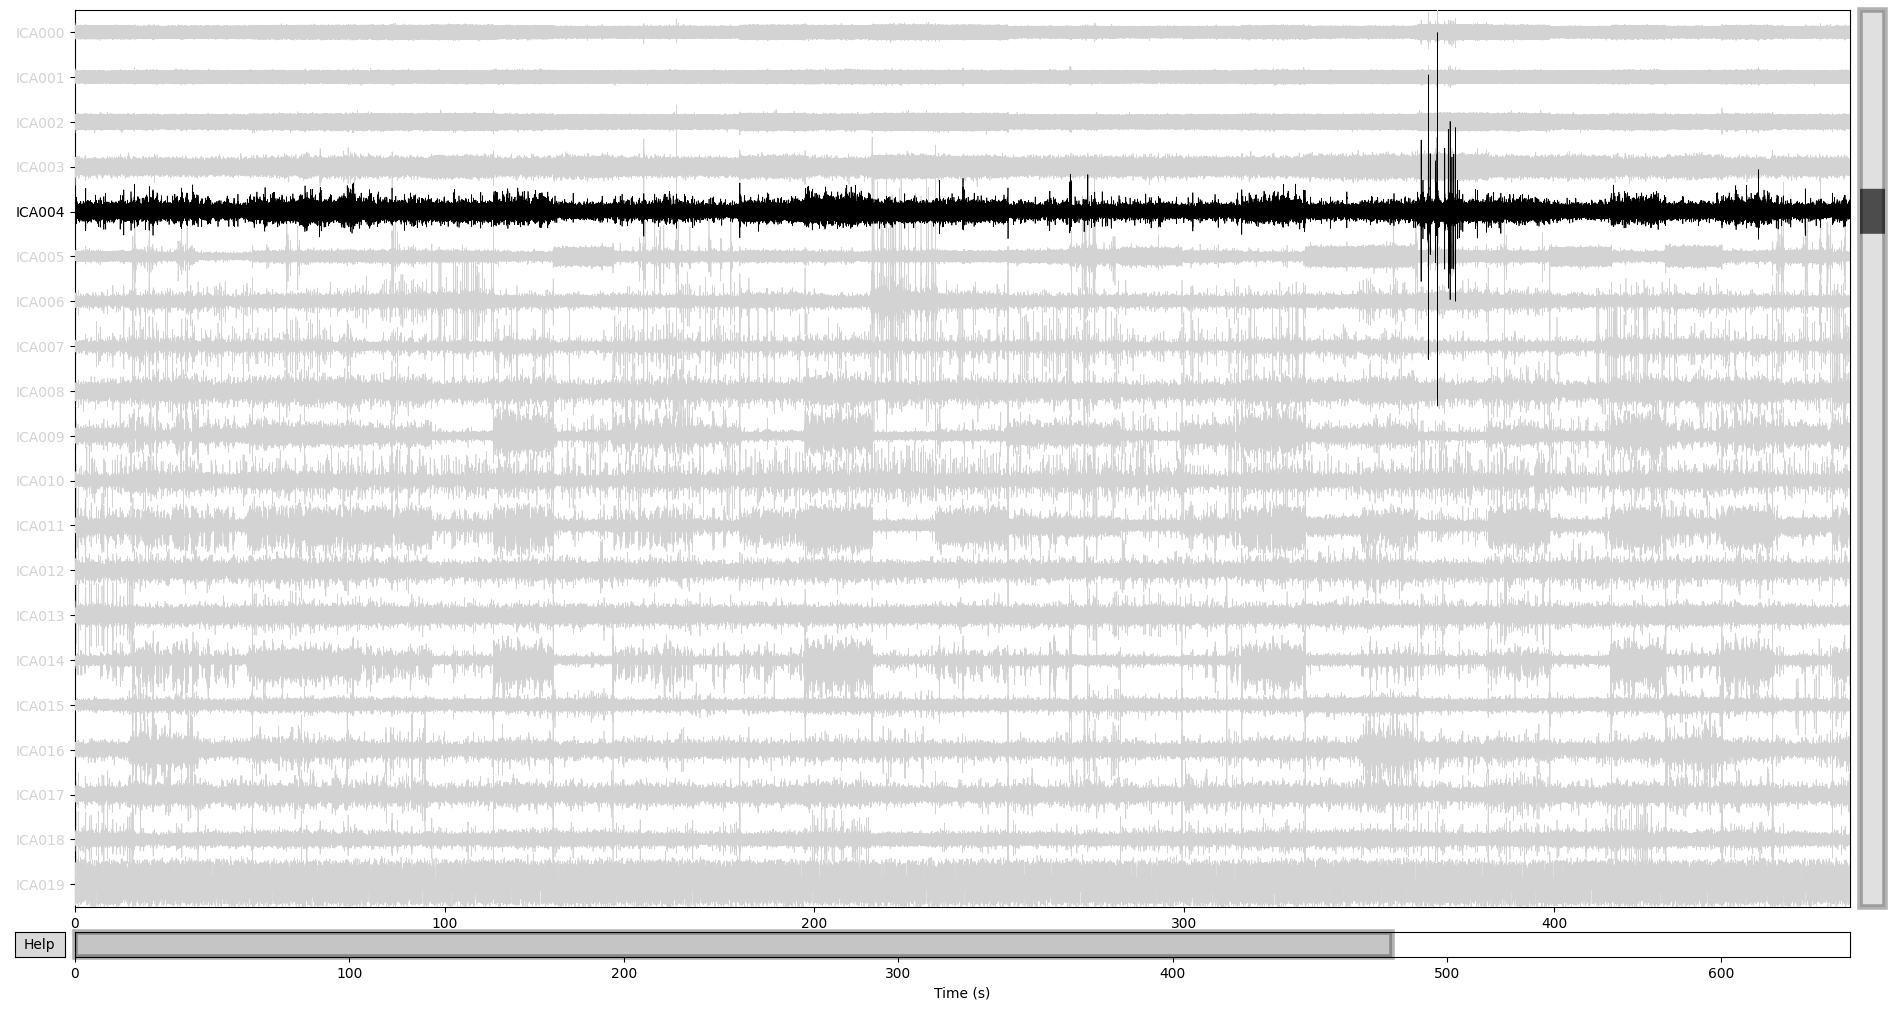

In [115]:
ica_filt.plot_sources(filt_raw, start=0,stop=480, use_opengl=False,show=True)

In [53]:
# [7,8,9] ==> Theta Waves
# [0, ] ==> Gamma Waves
psd_args = {'fmin': 1, 'fmax': 120}  # Limit frequency band between 30 and 120 Hz
ica_filt.plot_properties(filt_raw, picks=[4],psd_args=psd_args)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
323 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 700x600 with 6 Axes>]

In [ ]:
# eog_indices, eog_scores = ica_filt.find_bads_muscle(filt_raw)
# ica_filt.exclude = eog_indices
# # barplot of ICA component "EOG match" scores
# ica_filt.plot_scores(eog_scores)

In [123]:
ica_filt.save("ICAs/ICA_train_sub1_all_class_Analysis_20_compo_32_channels_removed_bads_Best_Raw-ica.fif")

Writing ICA solution to e:\CRCV\Research\EEG\data\ICAs\ICA_train_sub1_all_class_Analysis_20_compo_32_channels_removed_bads_Best_Raw-ica.fif...


Method,fastica
Fit,27 iterations on raw data (646800 samples)
ICA components,20
Available PCA components,32
Channel types,eeg
ICA components marked for exclusion,ICA001ICA002ICA012ICA013ICA015ICA017ICA019ICA010ICA007ICA008ICA003ICA009ICA018ICA011ICA005ICA016ICA014ICA000ICA006


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 19 ICA components
    Projecting back using 32 PCA components


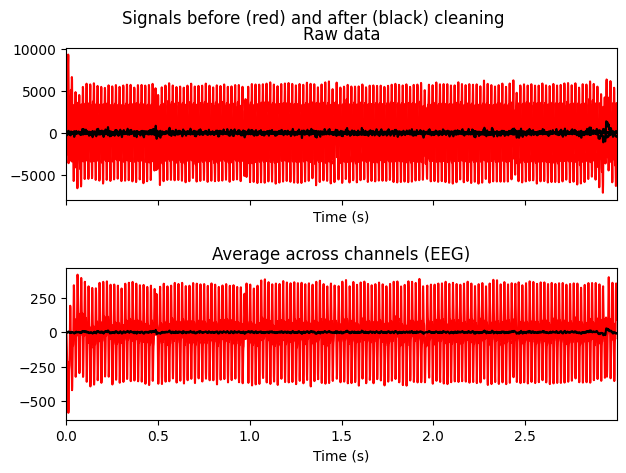

In [116]:
# blinks
ica_filt.plot_overlay(filt_raw, picks="eeg")

In [ ]:
# [1,3,4,5,8]
# ica_filt.plot_properties(Raw_MNE_EEG_DATA, picks=[4,6,9])

In [ ]:
# ica_filt.exclude = [0,1,2,4]
# ica_filt.exclude = []

In [ ]:
# ica_filt.exclude =[2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]  # Indices of components to exclude
# ica_filt.exclude =[3] 
# ica_filt.exclude =[0,3,4,5,6,8,9] 

In [ ]:
Raw_MNE_EEG_DATA.info["bads"]

In [ ]:
# RemainingChannels = 128 - len(BadChannels)
# Raw_MNE_EEG_DATA = Raw_MNE_EEG_DATA.drop_channels(Raw_MNE_EEG_DATA.info["bads"])

In [56]:
RemainingChannels

32

In [117]:
LOWER_TS = 20
HIGHER_TS = 480
Raw_MNE_EEG_DATA.get_data().shape

(32, 646800)

In [118]:
eeg_features_full = eeg_features.reshape(numberofSamples,freqLength,numChannels)
np_raw_before_ICA_full = Raw_MNE_EEG_DATA.get_data().reshape(numberofSamples,freqLength,RemainingChannels)

In [119]:
np_raw_before_ICA_slice = np_raw_before_ICA_full[:, LOWER_TS:HIGHER_TS, :]
eeg_features_slice = eeg_features_full[:, LOWER_TS:HIGHER_TS , : ]

np_raw_before_ICA_slice = np_raw_before_ICA_slice.reshape(numberofSamples, -1)
eeg_features_slice = eeg_features_slice.reshape(numberofSamples, -1)

In [120]:
X_tsne_flattned_RAW = TSNE(n_components=3,perplexity=40, init="pca", learning_rate=0.1, n_iter=1000).fit_transform(eeg_features_slice)

c:\Users\ASUS\.conda\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


## TSNE Before and After Applying ICA

In [121]:
# np_raw_before_ICA = Raw_MNE_EEG_DATA.get_data()
# eeg_features_before_ICA = np_raw_before_ICA.reshape(numberofSamples, -1)
X_tsne_flattned_before_ICA = TSNE(n_components=3,perplexity=40, init="pca", learning_rate=0.1, n_iter=1000).fit_transform(np_raw_before_ICA_slice)

Raw_MNE_EEG_DATA_with_ICA = Raw_MNE_EEG_DATA.copy()
Raw_MNE_EEG_DATA_with_ICA = ica_filt.apply(Raw_MNE_EEG_DATA_with_ICA)

np_raw_after_ICA = Raw_MNE_EEG_DATA_with_ICA.get_data()
np_raw_after_ICA = np_raw_after_ICA.reshape(numberofSamples,freqLength,RemainingChannels)
np_raw_after_ICA = np_raw_after_ICA[:, LOWER_TS:HIGHER_TS, :]
print(f"Raw_MNE_EEG_DATA_with_ICA :{np_raw_after_ICA.shape}")

eeg_features_new_after_ICA = np_raw_after_ICA.reshape(numberofSamples, -1)
X_tsne_flattned_after_ICA = TSNE(n_components=3,perplexity=40, init="pca", learning_rate=0.1, n_iter=1000).fit_transform(eeg_features_new_after_ICA)

c:\Users\ASUS\.conda\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 19 ICA components
    Projecting back using 32 PCA components
Raw_MNE_EEG_DATA_with_ICA :(1320, 460, 32)


c:\Users\ASUS\.conda\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
# Raw_MNE_EEG_DATA_with_ICA.plot()
# Raw_MNE_EEG_DATA_with_ICA.plot( exclude="bads", amplitude=False)

In [63]:
plt.figure().set_size_inches(20,10)
plt.clf()
cmap = plt.cm.get_cmap("hsv", len(label_wise_data.keys()))
gen_colors = []
handles = []
cmaps = []
for eeg_label in list(label_wise_data.keys()):
    _patch = mpatches.Patch(color=cmap(eeg_label), label=f'Class {eeg_label}') 
    cmaps.append(cmap(eeg_label))
    handles.append(_patch)
for i in range(eeg_features.shape[0]):
    colorMap = cmaps[eeg_labels[i]]
    gen_colors.append(colorMap)

In [ ]:
max(X_tsne_flattned_after_ICA[:,0])
np.argmax(X_tsne_flattned_after_ICA[:,0])

In [49]:
%matplotlib inline 
%matplotlib qt
# plt.ioff()
# %matplotlib notebook

In [66]:
plt.clf()
# plt.figure(figsize=(10, 10))
# plt.scatter(X_tsne_flattned_RAW[:,0], X_tsne_flattned_RAW[:,1], c=gen_colors, alpha=0.5)
plt.scatter(X_tsne_flattned_after_ICA[:,1], X_tsne_flattned_after_ICA[:,2], c=gen_colors, alpha=0.5)
# plt.scatter(X_tsne_flattned_imagenet[:,0], X_tsne_flattned_imagenet[:,1], c=gen_colors_imagenet, alpha=0.5)
# plt.plot([X_tsne_flattned_preds[:,0],X_tsne_flattned[:,0]],[X_tsne_flattned_preds[:,1],X_tsne_flattned[:,1]], c="blue", lw=0.5)
# plt.legend(handles=handles_pred_imagenet, loc="lower right", fontsize=13, bbox_to_anchor=(2.2, 0.1),fancybox=True,ncol=5)
# plt.savefig("test_train_preds_fc.png")


In [124]:
plt.clf()
fig = plt.figure(figsize=(15, 15))
# fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)

ax.set_title(f"EEG data TimeStamp : 320_480 ")
# ax.view_init(azim=90, elev=1)
ax.view_init(azim=45, elev=20)
_ = ax.text2D(0.8, 0.05, s=f"n_samples={X_tsne_flattned_RAW.shape[0]}", transform=ax.transAxes)

# ax.scatter(X_tsne_flattned_before_ICA[:,0], X_tsne_flattned_before_ICA[:,1], X_tsne_flattned_before_ICA[:,2], c=gen_colors, s=30, alpha=0.8)
ax.scatter(X_tsne_flattned_after_ICA[:,0], X_tsne_flattned_after_ICA[:,1], X_tsne_flattned_after_ICA[:,2], c=gen_colors, s=30, alpha=0.8)
# ax.scatter(X_tsne_flattned_RAW[:,0], X_tsne_flattned_RAW[:,2],X_tsne_flattned_RAW[:,1], c=gen_colors, s=30, alpha=0.8)
ax.legend(handles=handles, loc="best", fontsize=13,fancybox=True,ncol=5)
# fig.savefig(f"outc/PO3_PO4_20_480.png")
# plt.show()

In [122]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np

plt.clf()

ELEVATION = 45
VIEW_ANGLE = 75

# Create a new figure
fig = plt.figure(figsize=(20, 10))

# Add the first subplot
ax1 = fig.add_subplot(131, projection='3d') # '121' means 1 row, 2 columns, and use the first cell
ax1.set_title("EEG data Raw")
# ax.view_init(azim=90, elev=1)
ax1.view_init(azim=VIEW_ANGLE, elev=ELEVATION)
_ = ax1.text2D(0.8, 0.05, s="n_samples=1500", transform=ax1.transAxes)

ax1.scatter(X_tsne_flattned_RAW[:,0], X_tsne_flattned_RAW[:,1], X_tsne_flattned_RAW[:,2], c=gen_colors, s=50, alpha=0.8)
# ax1.legend(handles=handles, loc="best", fontsize=13,fancybox=True,ncol=5)

# Add the second subplot
ax2 = fig.add_subplot(132, projection='3d') # '122' means 1 row, 2 columns, and use the second cell
ax2.set_title("EEG data before ICA")
# ax.view_init(azim=90, elev=1)
ax2.view_init(azim=VIEW_ANGLE, elev=ELEVATION)
_ = ax2.text2D(0.8, 0.05, s="n_samples=1500", transform=ax2.transAxes)

ax2.scatter(X_tsne_flattned_before_ICA[:,0], X_tsne_flattned_before_ICA[:,1], X_tsne_flattned_before_ICA[:,2], c=gen_colors, s=50, alpha=0.8)
# ax2.legend(handles=handles, loc="best", fontsize=13,fancybox=True,ncol=5)

# Add the third subplot
ax3 = fig.add_subplot(133, projection='3d') # '122' means 1 row, 2 columns, and use the second cell
ax3.set_title("EEG data after ICA")
# ax.view_init(azim=90, elev=1)
ax3.view_init(azim=VIEW_ANGLE, elev=ELEVATION)
_ = ax3.text2D(0.8, 0.05, s="n_samples=1500", transform=ax3.transAxes)

ax3.scatter(X_tsne_flattned_after_ICA[:,0], X_tsne_flattned_after_ICA[:,1], X_tsne_flattned_after_ICA[:,2], c=gen_colors, s=50, alpha=0.8)
# ax3.legend(handles=handles, loc="best", fontsize=13,fancybox=True,ncol=5)

# Show the figure
plt.show()

In [ ]:
import umap
import umap.plot

In [ ]:
mapper = umap.UMAP().fit(eeg_features_new_after_ICA)

In [ ]:
umap.plot.points(mapper, labels=np.array(eeg_labels), theme='fire')

In [ ]:
# umap.plot.diagnostic(mapper, diagnostic_type='pca')
umap.plot.connectivity(mapper, edge_bundling='hammer')